In [93]:
import json
import funzioni_topic_detection as ftd
import funzioni_preprocessing_text as fpt
import gensim
from gensim.models import TfidfModel
from gensim.models import CoherenceModel

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

import itertools

from scipy import sparse

In [61]:
corpus=json.load(open('dataset/allDocuments3.json'))

In [62]:
postPuliti,bigram_mdl=fpt.clear_corpus(corpus)

In [127]:
id2word = gensim.corpora.Dictionary(postPuliti)

corpus2 = [id2word.doc2bow(doc) for doc in postPuliti]
tfidf = TfidfModel(corpus2, id2word=id2word)
tfidfCorpus=[tfidf[bow] for bow in corpus2]

low_value = 0.01
low_value_words = []
for bow in corpus2:
    low_value_words += [id for id, value in tfidf[bow] if value < low_value]
id2word.filter_tokens(low_value_words)
new_corpus2=[]
newPostPuliti=[]
for doc in postPuliti:
    if bow:=id2word.doc2bow(doc):
        new_corpus2.append(bow)
        newPostPuliti.append(doc)

# new_corpus2 = [id2word.doc2bow(doc) for doc in postPuliti]

In [131]:
## LSA
n_topics=9
n_iter=300
cutoff_tf_idf=0.01

lemmatized_bigram_string=[' '.join(word) for word in postPuliti]
vectorizer = TfidfVectorizer()
M=vectorizer.fit_transform(lemmatized_bigram_string)
M=M.toarray()
row,column=M.shape
for i, j in itertools.product(range(row), range(column)):
    if M[i][j]<cutoff_tf_idf:
        M[i][j]=0
M=sparse.csr_matrix(M)

termini=vectorizer.get_feature_names_out().tolist()
lsa = TruncatedSVD(n_components=n_topics,n_iter=n_iter)
lsa.fit(M)
p =   {f"concetto_{str(i)}": list(
            sorted(zip(termini, abs(j)), key=lambda x: x[1],
                   reverse=True)[:10])
        for i, j in enumerate(lsa.components_)}
#concetti=self.print_topics()

In [ ]:
for idx,val in p.items():
    print(idx,val)

In [130]:
lsimodel=gensim.models.lsimodel.LsiModel(new_corpus2, num_topics=9, id2word=id2word)
cm=CoherenceModel(model=lsimodel, texts=newPostPuliti, coherence='c_v')
cm.get_coherence()

0.6047672480533677

In [ ]:
lsimodel.print_topics()

In [68]:
ldamodel=gensim.models.ldamodel.LdaModel(new_corpus2, num_topics=6, id2word=id2word)
cm=CoherenceModel(model=ldamodel, texts=newPostPuliti, coherence='c_v')
cm.get_coherence()

0.6002049322041375

In [70]:
hdpmodel=gensim.models.hdpmodel.HdpModel(new_corpus2, id2word=id2word)
cm=CoherenceModel(model=hdpmodel, texts=newPostPuliti, coherence='c_v')
cm.get_coherence()

0.8087552707983293

In [88]:
ldaModelDict={}

In [89]:
coerenza=[]

In [90]:
for i in range(5,16):
    ldamodel=gensim.models.ldamodel.LdaModel(new_corpus2, num_topics=i, id2word=id2word,random_state=33)
    ldaModelDict[i]=ldamodel
    cm=CoherenceModel(model=ldamodel, texts=newPostPuliti, coherence='c_v')
    coerenza.append((i,cm.get_coherence()))
    print(i,cm.get_coherence())

5 0.574031881126854
6 0.5706359985688749
7 0.5681038782623872
8 0.5475679478327901
9 0.5277335970546938
10 0.5338069201579148
11 0.5399432661891232
12 0.5352632364712719
13 0.5253499380106903
14 0.5573260544616905
15 0.4823984756952028


In [97]:
from matplotlib import pyplot as plt

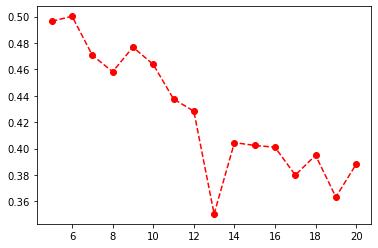

In [76]:
plt.plot([x[0] for x in coerenza],[x[1] for x in coerenza],marker='o',color='r',linestyle='--',label='coerenza')
plt.show()

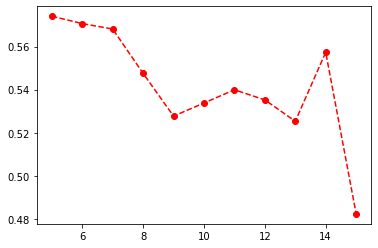

In [98]:
plt.plot([x[0] for x in coerenza],[x[1] for x in coerenza],marker='o',color='r',linestyle='--',label='coerenza')
plt.show()

In [99]:
ldamodel=gensim.models.ldamodel.LdaModel(new_corpus2, num_topics=6, id2word=id2word,passes=100, iterations = 200, random_state=65,minimum_probability=0.1)
cm=CoherenceModel(model=ldamodel, texts=newPostPuliti, coherence='c_v')
print(cm.get_coherence())

0.4926540969912195


In [44]:
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.026*"miah" + 0.021*"hochul" + 0.016*"northern_california" + 0.016*"blaze" + 0.016*"attack_health" + 0.016*"life_save" + 0.016*"humanitarian" + 0.016*"health_worker" + 0.016*"convention" + 0.016*"general_election"')
(1, '0.024*"avocado" + 0.024*"philip" + 0.024*"tornado" + 0.024*"miner" + 0.024*"holiday" + 0.017*"dressing" + 0.017*"herb" + 0.017*"salad" + 0.017*"caper" + 0.017*"monarchy"')
(2, '0.029*"disney" + 0.024*"journalist" + 0.019*"disney_world" + 0.019*"gay_days" + 0.019*"summer_temperature" + 0.019*"dyke" + 0.019*"roesie" + 0.015*"judge" + 0.015*"peppermint" + 0.015*"obama"')
(3, '0.038*"birria" + 0.024*"odesa" + 0.024*"theater" + 0.024*"opera" + 0.024*"mccraw" + 0.016*"casualty" + 0.016*"trench" + 0.016*"veklenko" + 0.016*"estimate_people" + 0.016*"grave"')
(4, '0.026*"funeral" + 0.026*"cake" + 0.021*"merkel" + 0.021*"human_coalition" + 0.016*"greek" + 0.016*"ice" + 0.016*"tea" + 0.016*"matzo" + 0.011*"tokyo" + 0.011*"numb"')
(5, '0.028*"yang" + 0.023*"cnn" + 0.017*"zuc